In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import pickle
import seaborn as sns

from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score, cross_val_predict

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer

get the data

In [2]:
feats = pd.read_csv("../System/feats_train.csv")

af = feats.loc[feats['class'] == 1]
naf = feats.loc[feats['class'] == 0]

labels = feats["class"]
feats.drop('class', axis=1, inplace=True)

feats.head()

,superlatives,degree_adverbs,comparative_adverbs,proper_nouns,dates,numbers,fp_pronouns,negations,pos_emotion,neg_emotion,...,readability,ap_num,ap_date,ap_title,alliteration,profanity,lexical_diversity,lexical_density,function_words,spelling_errors
0,0.002488,0.200000,0.133333,0.224000,0.000000,0.012438,0.230769,0.000000,0.009950,0.014925,...,0.4097,0.0,1.0,1.0,0.000000,0.000000,0.613692,0.589242,0.410758,0.029340
1,0.000000,0.047619,0.047619,0.170940,0.000000,0.000000,0.545455,0.010471,0.002618,0.005236,...,0.3935,0.0,1.0,1.0,0.166667,0.002577,0.590206,0.597938,0.402062,0.064433
2,0.004255,0.111111,0.000000,0.163934,0.017021,0.008511,0.125000,0.017021,0.017021,0.004255,...,0.3905,0.0,1.0,1.0,0.000000,0.000000,0.566667,0.575000,0.425000,0.016667
3,0.000000,0.083333,0.000000,0.266667,0.000000,0.037037,0.000000,0.005291,0.015873,0.000000,...,0.2764,1.0,1.0,0.0,0.666667,0.000000,0.708333,0.604167,0.395833,0.156250
4,0.002066,0.000000,0.000000,0.152866,0.004132,0.035124,0.555556,0.002066,0.004132,0.006198,...,0.5461,1.0,1.0,1.0,0.000000,0.000000,0.529532,0.610998,0.389002,0.042770


Get the feature groups

In [3]:
groups = ["complexity", "deception", "details", "formality"
                  ,"humour", "imagination", "vagueness"]

colour_map = {"complexity":"b", "deception":"g", "details":"r", "formality":"c"
                  ,"humour":"m", "imagination":"y", "vagueness":"k"}

feat_group_map = dict()

for g in groups:
    with open("../System/feature_sets/{}.txt".format(g)) as file:
        for line in file:
            if line.strip() in feats.columns:
                feat_group_map[line.strip()] = g

Make the SVC (No Scaling)

In [4]:
SVC_no_scaling = LinearSVC()
K_FOLDS = 10

SVC_no_scaling.fit(feats, labels)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

Now plot the ranked features

In [5]:
feats.columns.values

array(['superlatives', 'degree_adverbs', 'comparative_adverbs',
       'proper_nouns', 'dates', 'numbers', 'fp_pronouns', 'negations',
       'pos_emotion', 'neg_emotion', 'time_related', 'sense_words',
       'relationships', 'motion_words', 'exaggeration', 'vague_degree',
       'spatial_words', 'ima_conjunctions', 'inf_verb', 'ima_verb',
       'preposition', 'articles', 'ima_determiners', 'adjectives',
       'claws_ambiguity', 'usas_ambiguity', 'synset_ambiguity',
       'quote_proportion', 'avg_sentence_len',
       'contextual_imbalance_head', 'contextual_imbalance_body',
       'body_punctuation', 'head_punctuation', 'readability', 'ap_num',
       'ap_date', 'ap_title', 'alliteration', 'profanity',
       'lexical_diversity', 'lexical_density', 'function_words',
       'spelling_errors'], dtype=object)

In [6]:
def get_svc_weights(CLF, feats=feats):
    svc_coeffs = CLF.coef_.ravel()

    rank_pd = pd.DataFrame()
    rank_pd['SVC Weights'] = svc_coeffs
    rank_pd['Features'] = feats.columns.values
    rank_pd.set_index("Features", inplace=True)
    sorted_ranks = rank_pd.sort_values(by='SVC Weights', ascending=False)
    return sorted_ranks
    
sorted_ranks = get_svc_weights(SVC_no_scaling)

In [7]:
# Sort out the colours
colours = [colour_map[feat_group_map[feat]] for feat in sorted_ranks.index.values]

In [8]:
sorted_ranks['SVC Weights'].values

array([ 3.40681928,  3.30961808,  2.18983803,  1.8332235 ,  1.482272  ,
        1.33270477,  1.31272527,  0.84397602,  0.82758631,  0.74116654,
        0.73688347,  0.64199754,  0.58789272,  0.57219025,  0.26129112,
        0.1951921 ,  0.14057793,  0.07032043, -0.0200509 , -0.02393289,
       -0.08416511, -0.09689353, -0.10708233, -0.23577345, -0.30923879,
       -0.41474763, -0.53636957, -0.54626556, -0.59123184, -0.73817642,
       -0.82033592, -0.85587044, -0.86713758, -0.93647104, -1.02621799,
       -1.04511243, -1.10587535, -1.13029163, -1.38856628, -1.63433511,
       -1.915686  , -2.21702135, -3.25838916])

In [9]:
sorted_ranks['group'] = [feat_group_map[feat] for feat in sorted_ranks.index.values]

[]

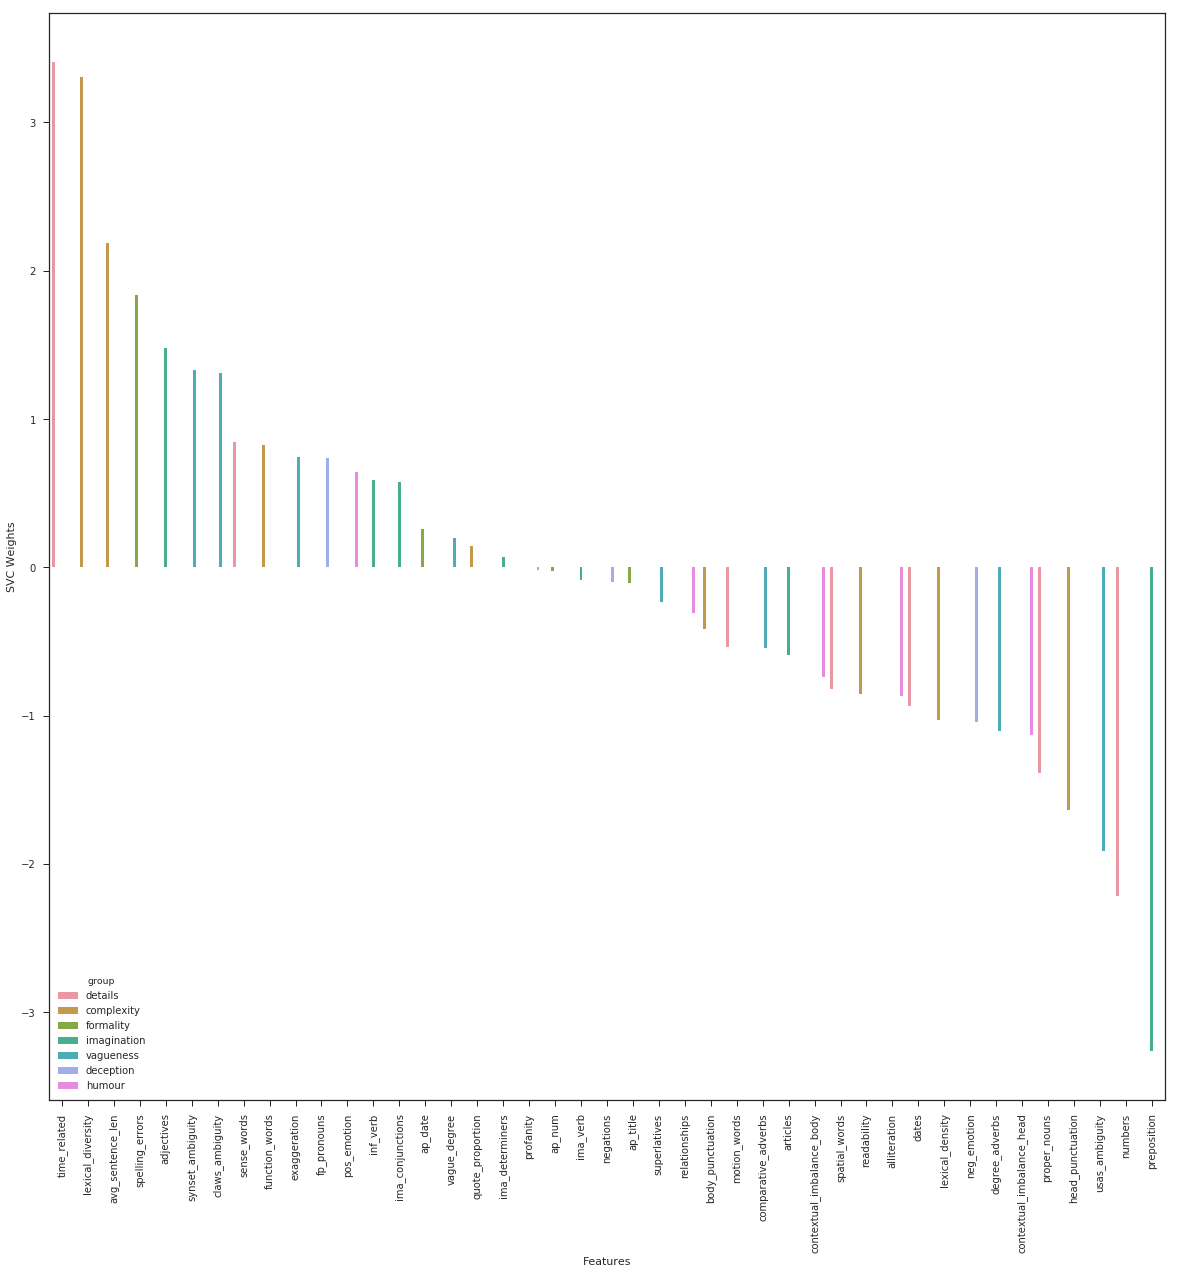

In [10]:
sns.set(style='ticks')

fig, ax = plt.subplots(figsize=(20,20))

# sns.barplot(sorted_ranks, hue="group")
sns.barplot(x=sorted_ranks.index, y=sorted_ranks["SVC Weights"], hue=sorted_ranks["group"], ax=ax)
plt.xticks(rotation='vertical')

plt.plot()

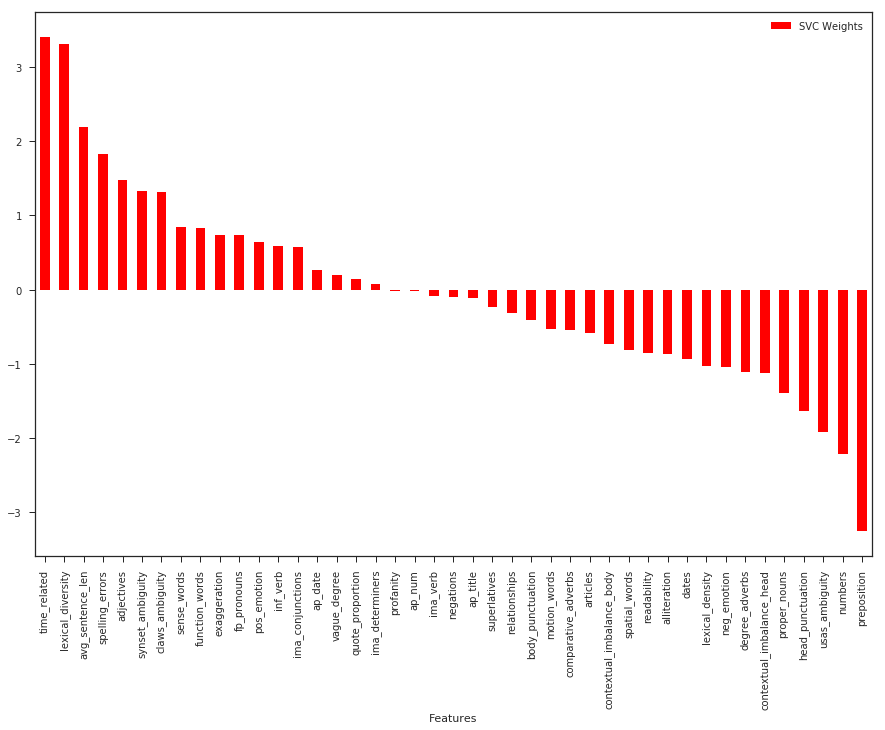

In [11]:
sorted_ranks.plot(kind='bar', figsize=(15,10), color=colours)
# for i in len(colours):
#     barlist[i].set_color(colours[i])
# fig,ax = plt.subplots()
# for g in groups:
#     group_pd = sorted_ranks.loc[sorted_ranks.group==g]
#     group_pd.plot.bar(figsize=(15,10), color=colour_map[g], ax=ax, label=g)

plt.show()

In [12]:
# Sort the data by absolute value of svm weight
sorted_data = sorted_ranks.assign(f=abs(sorted_ranks['SVC Weights']))\
    .sort_values(by='f', ascending=False)\
    .drop('f', axis=1)
# sorted_data.plot.bar(figsize=(15,10))
# plt.show()
sorted_data

,SVC Weights,group
Features,,
time_related,3.406819,details
lexical_diversity,3.309618,complexity
preposition,-3.258389,imagination
numbers,-2.217021,details
avg_sentence_len,2.189838,complexity
usas_ambiguity,-1.915686,vagueness
spelling_errors,1.833224,formality
head_punctuation,-1.634335,complexity
adjectives,1.482272,imagination


Do it with Scaling.

In [13]:
SVC_scaling = LinearSVC()
K_FOLDS = 10

pipeline = Pipeline([
        ('normalizer', StandardScaler()),  # Step1 - normalize data
#         ('normalizer', RobustScaler(quantile_range=(25, 75))),  # Step1 - normalize data
        ('clf', SVC_scaling)  # Step2 - classifier
        ])

pipeline.fit(feats, labels)
a = 0

[]

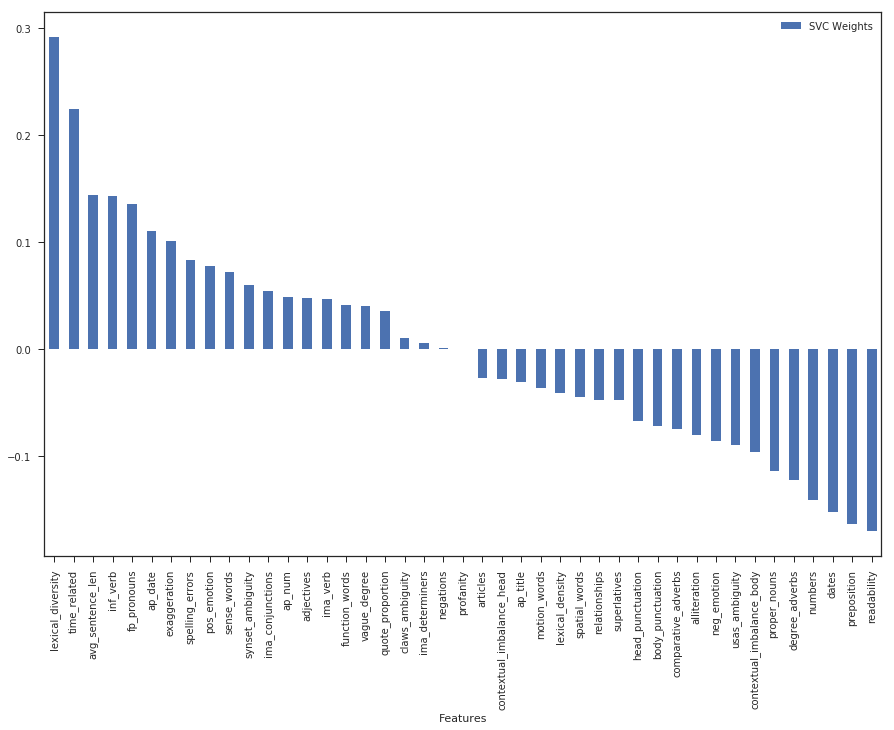

In [14]:
scaled_ranks = get_svc_weights(SVC_scaling)
scaled_ranks['group'] = [feat_group_map[feat] for feat in scaled_ranks.index.values]
scaled_ranks.plot.bar(figsize=(15,10))
plt.plot()

In [15]:
# Sort the data by absolute value of svm weight
sorted_data = scaled_ranks.assign(f=abs(scaled_ranks['SVC Weights']))\
    .sort_values(by='f', ascending=False)\
    .drop('f', axis=1)
# sorted_data.plot.bar(figsize=(15,10))
# plt.show()
print(sorted_data.head(10).to_latex())

\begin{tabular}{lrl}
\toprule
{} &  SVC Weights &        group \\
Features          &              &              \\
\midrule
lexical\_diversity &     0.291495 &   complexity \\
time\_related      &     0.224165 &      details \\
readability       &    -0.170452 &   complexity \\
preposition       &    -0.163833 &  imagination \\
dates             &    -0.152853 &      details \\
avg\_sentence\_len  &     0.143608 &   complexity \\
inf\_verb          &     0.143027 &  imagination \\
numbers           &    -0.141150 &      details \\
fp\_pronouns       &     0.135524 &    deception \\
degree\_adverbs    &    -0.122189 &    vagueness \\
\bottomrule
\end{tabular}



[]

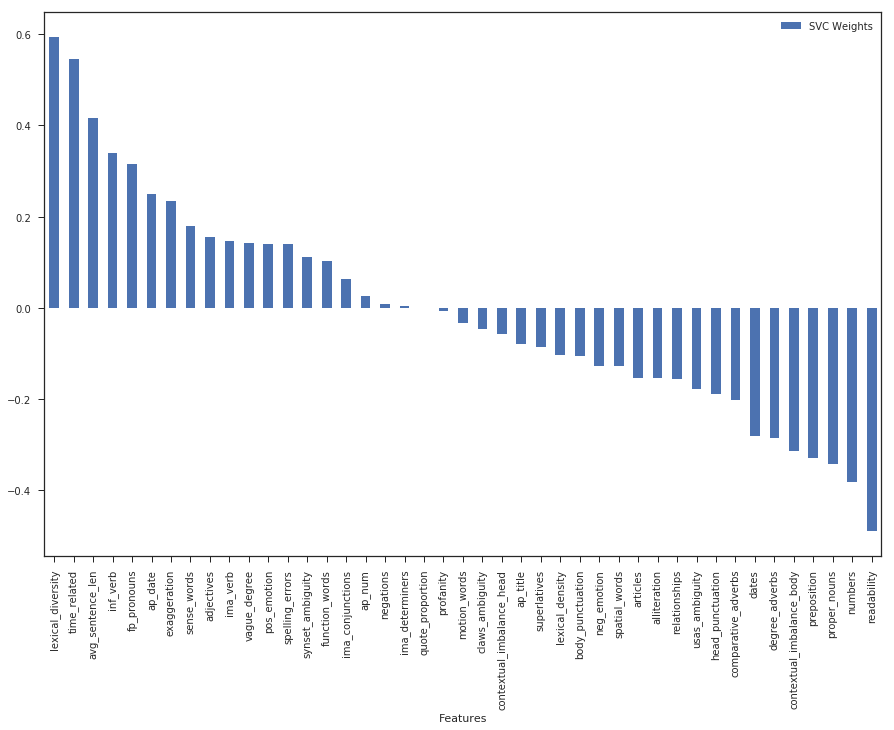

In [16]:
# Look at tuned SVM

# open a file, where you stored the pickled data
file = open("../System/clfs/standard_linear_svc.sav", 'rb')
tuned_clf = pickle.load(file)

pipeline = Pipeline([
#         ('normalizer', MinMaxScaler(feature_range=(0, 1))),  # Step1 - normalize data
#         ('normalizer', RobustScaler(quantile_range=(25, 75))),  # Step1 - normalize data
        ('normalizer', StandardScaler()),
        ('clf', tuned_clf)  # Step2 - classifier
        ])

pipeline.fit(feats, labels)

scaled_ranks = get_svc_weights(tuned_clf)
scaled_ranks.plot.bar(figsize=(15,10))
plt.plot()

In [17]:

# Sort the data by absolute value of svm weight
sorted_data = scaled_ranks.assign(f=abs(scaled_ranks['SVC Weights']))\
    .sort_values(by='f', ascending=False)\
    .drop('f', axis=1)
# sorted_data.plot.bar(figsize=(15,10))
# plt.show()
sorted_data

,SVC Weights
Features,
lexical_diversity,0.593492
time_related,0.544394
readability,-0.489210
avg_sentence_len,0.415694
numbers,-0.380602
proper_nouns,-0.341000
inf_verb,0.338578
preposition,-0.328929
fp_pronouns,0.314329


Look at the fake news

[]

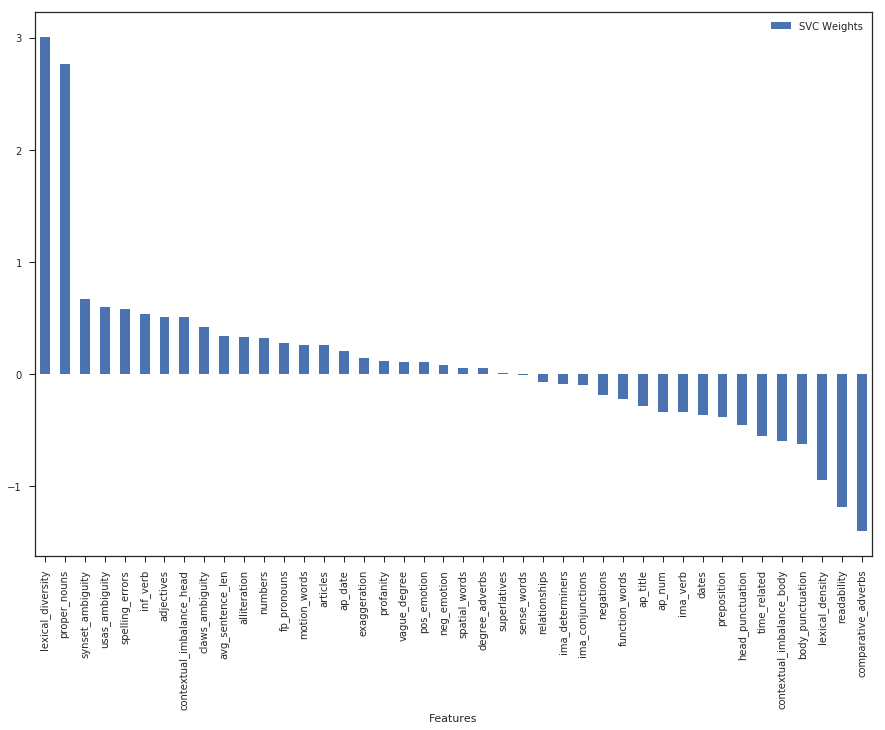

In [18]:
fake = pd.read_csv("../System/fake_news_feats_train.csv")

fake_labels = fake["class"]
fake.drop('class', axis=1, inplace=True)
clf_fake = LinearSVC()
clf_fake.fit(fake, fake_labels)

scaled_ranks = get_svc_weights(clf_fake, fake)
scaled_ranks['group'] = [feat_group_map[feat] for feat in scaled_ranks.index.values]
scaled_ranks.plot.bar(figsize=(15,10))
plt.plot()


In [19]:
# Sort the data by absolute value of svm weight
sorted_data = scaled_ranks.assign(f=abs(scaled_ranks['SVC Weights']))\
    .sort_values(by='f', ascending=False)\
    .drop('f', axis=1)
# sorted_data.plot.bar(figsize=(15,10))
# plt.show()
print(sorted_data.head(10).to_latex())
sorted_data.head(15)

\begin{tabular}{lrl}
\toprule
{} &  SVC Weights &       group \\
Features                  &              &             \\
\midrule
lexical\_diversity         &     3.004913 &  complexity \\
proper\_nouns              &     2.768067 &     details \\
comparative\_adverbs       &    -1.401958 &   vagueness \\
readability               &    -1.190184 &  complexity \\
lexical\_density           &    -0.948331 &  complexity \\
synset\_ambiguity          &     0.668974 &   vagueness \\
body\_punctuation          &    -0.621316 &  complexity \\
contextual\_imbalance\_body &    -0.601553 &      humour \\
usas\_ambiguity            &     0.596916 &   vagueness \\
spelling\_errors           &     0.579120 &   formality \\
\bottomrule
\end{tabular}



,SVC Weights,group
Features,,
lexical_diversity,3.004913,complexity
proper_nouns,2.768067,details
comparative_adverbs,-1.401958,vagueness
readability,-1.190184,complexity
lexical_density,-0.948331,complexity
synset_ambiguity,0.668974,vagueness
body_punctuation,-0.621316,complexity
contextual_imbalance_body,-0.601553,humour
usas_ambiguity,0.596916,vagueness
